This Jupyter Notebook is a revised version of a notebook originally from the StarDist project (URL: https://github.com/stardist/stardist/blob/master/examples/3D/2_training.ipynb). The programs included in this notebook are based on a wrapper that was written by Chentao Wen for the StarDist package.

Please shutdown all other training/prediction notebooks before running this notebook (as those might occupy the GPU memory otherwise).

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import CellTracker.stardistwrapper as sdw

/tmp/ipykernel_32629/469011404.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


2023-04-23 18:06:20.874598: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Load Data
This cell loads training images and labels for the StarDist model. The file paths for the training images and labels are specified using the variables `path_train_images` and `path_train_labels`, respectively. The file paths are in the form of a Unix glob pattern that matches all files with the extension .tif in the respective directories.

100%|█████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.42it/s]


number of images:   2
- training:         1
- validation:       1
X[0].shape=(21, 512, 1024)


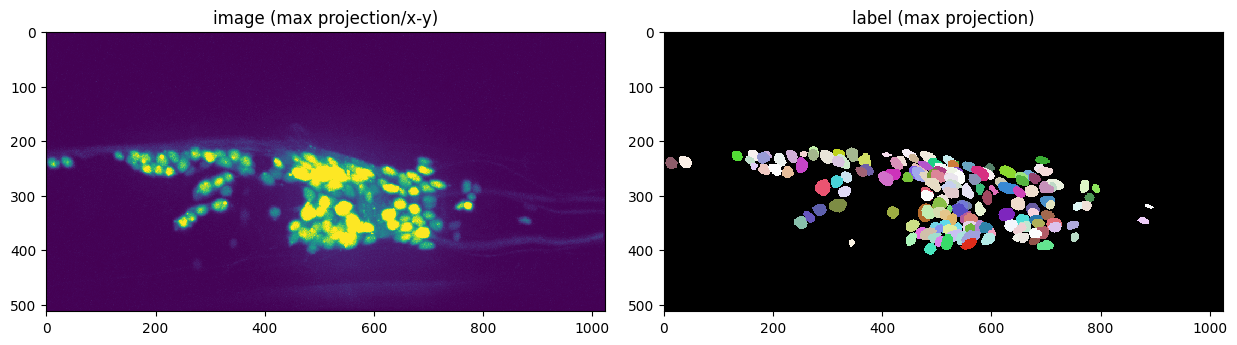

In [2]:
path_train_images = './worm1_stardist_training_data/raw/*.tif'
path_train_labels = './worm1_stardist_training_data/label/*.tif'
X, Y, X_trn, Y_trn, X_val, Y_val, n_channel = \
    sdw.load_training_images(path_train_images, path_train_labels, max_projection=True)

# Configuration

The `configure` function is utilized to specify a `StarDist3D` model, where the `model_name` parameter is utilized to save the trained model for retrieval at a later time.

In [3]:
model = sdw.configure(Y, n_channel, model_name="stardist_worm1")

empirical anisotropy of labeled objects = (6.0, 1.0909090909090908, 1.0)
div_by=(4, 8, 8)
n_dim: 3
axes: ZYXC
n_channel_in: 1
n_channel_out: 97
train_checkpoint: weights_best.h5
train_checkpoint_last: weights_last.h5
train_checkpoint_epoch: weights_now.h5
n_rays: 96
grid: (1, 2, 2)
anisotropy: (6.0, 1.0909090909090908, 1.0)
backbone: unet
rays_json: {'name': 'Rays_GoldenSpiral', 'kwargs': {'n': 96, 'anisotropy': (6.0, 1.0909090909090908, 1.0)}}
n_classes: None
unet_n_depth: 2
unet_kernel_size: (3, 3, 3)
unet_n_filter_base: 32
unet_n_conv_per_depth: 2
unet_pool: (2, 2, 2)
unet_activation: relu
unet_last_activation: relu
unet_batch_norm: False
unet_dropout: 0.0
unet_prefix: 
net_conv_after_unet: 128
net_input_shape: (None, None, None, 1)
net_mask_shape: (None, None, None, 1)
train_patch_size: [20, 112, 112]
train_background_reg: 0.0001
train_foreground_only: 0.9
train_sample_cache: True
train_dist_loss: mae
train_loss_weights: (1, 0.2)
train_class_weights: (1, 1)
train_epochs: 400
train_

base_model.py (149): output path for model already exists, files may be overwritten: /home/wen/PycharmProjects/3DeeCellTracker/Examples/use_stardist/stardist_models/stardist_worm1
2023-04-23 18:06:21.899535: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-23 18:06:21.934395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-23 18:06:21.934781: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 Ti computeCapability: 8.6
coreClock: 1.665GHz coreCount: 80 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 849.46GiB/s
2023-04-23 18:06:21.934800: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-23 18:06:21.

Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.358396, nms_thresh=0.3.


2023-04-23 18:06:22.388961: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3504000000 Hz
2023-04-23 18:06:22.511234: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-23 18:06:22.855004: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2023-04-23 18:06:23.253840: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-23 18:06:23.577021: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


median object size:      [ 4. 22. 24.]
network field of view :  [25 46 46]


# Data Augmentation

The `augmenter` function applies random flips and intensity changes to augment the training data, thereby increasing the diversity of the dataset. Several examples of the augmented data will be displayed in this section.

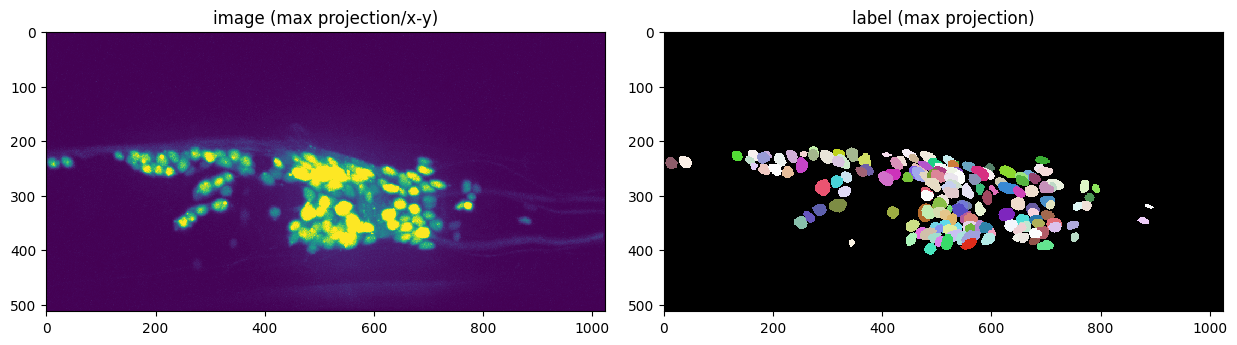

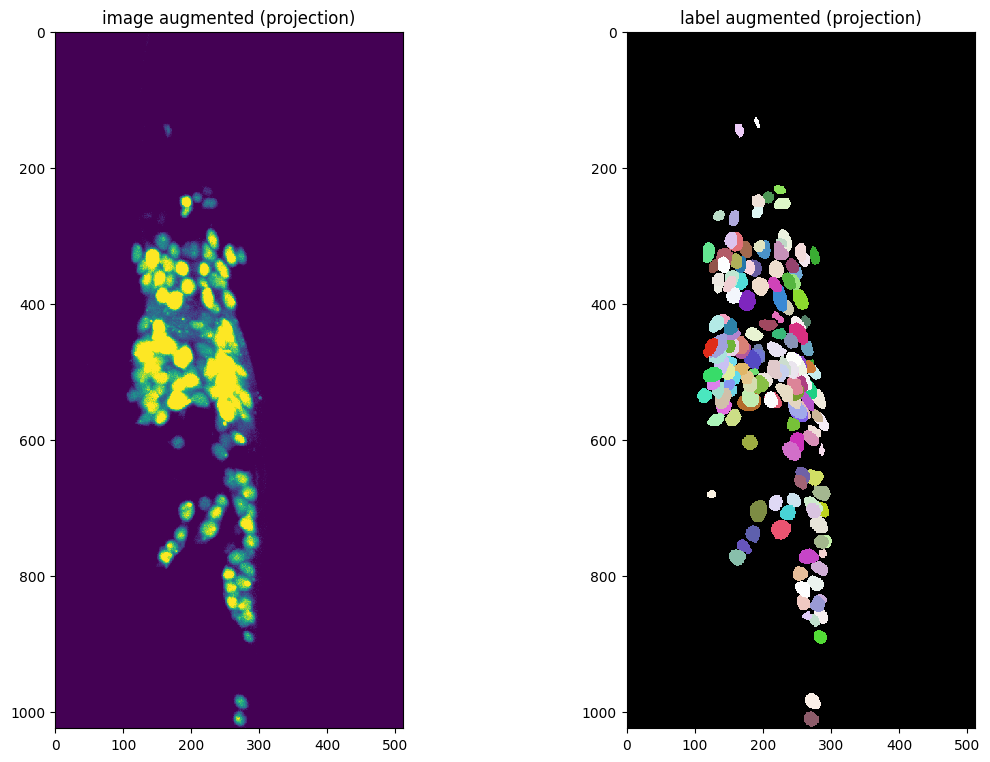

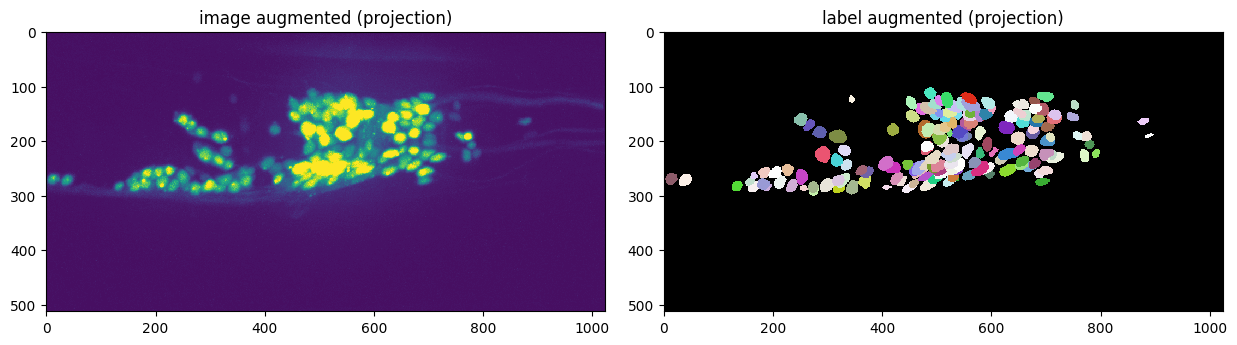

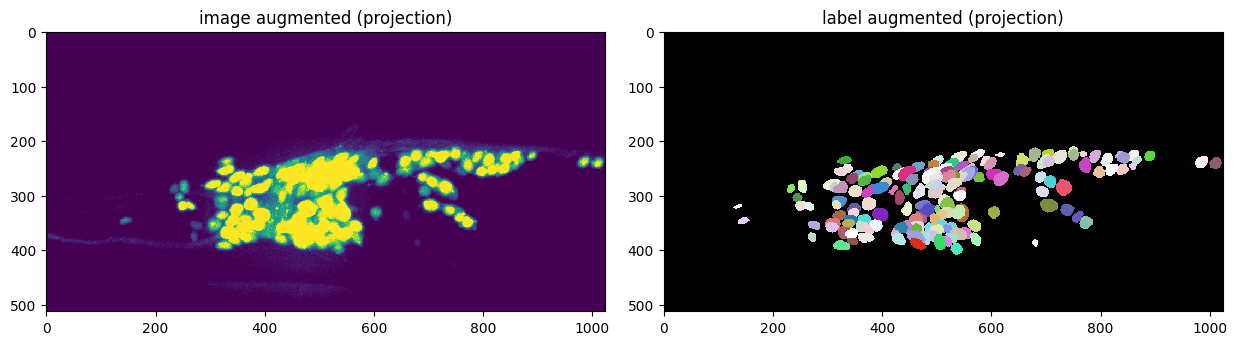

In [4]:
# plot some augmented examples
img, lbl = X[0],Y[0]
sdw.plot_img_label_max_projection(img, lbl)
for _ in range(3):
    img_aug, lbl_aug = sdw.augmenter(img,lbl)
    sdw.plot_img_label_max_projection(img_aug, lbl_aug, img_title="image augmented (projection)", lbl_title="label augmented (projection)")

# Training

The `train` method will train the StarDist model by utilizing the augmented data. The `epochs` parameter can be adjusted to specify a longer or shorter training duration (the default value of 500 is a good starting point).

In [ ]:
model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=sdw.augmenter, epochs=500)

# Threshold optimization

While the default values for the probability and non-maximum suppression thresholds already yield good results in many cases, we still recommend to adapt the thresholds to your data. The optimized threshold values are saved to disk and will be automatically loaded with the model.

In [6]:
model.optimize_thresholds(X_val, Y_val)

NMS threshold = 0.5:   0%|                                           | 0/20 [00:00<?, ?it/s]
Qhull output at end
Qhull precision warning: repartition point p251 from f98 as a outside point above a hidden facet f93 dist 0.0043 nearest vertices 0.18
NMS threshold = 0.5:  25%|████▊              | 5/20 [00:12<01:20,  5.35s/it, 0.335 -> 0.026]
Qhull output at end
Qhull precision warning: repartition point p251 from f98 as a outside point above a hidden facet f93 dist 0.0043 nearest vertices 0.18
NMS threshold = 0.5:  75%|█████████████▌    | 15/20 [00:29<00:09,  1.98s/it, 0.551 -> 0.069]


Using optimized values: prob_thresh=0.537581, nms_thresh=0.3.
Saving to 'thresholds.json'.


{'prob': 0.5375807942920214, 'nms': 0.3}

# Evaluation the segmentation use the trained model

In this section, the labels for the first validation image is predicted and shown. If only one 3D image/label was provided for training, the prediction for this training image will be calculated instead of the validation images.

In [7]:
Y0_val_pred, prob_map = model.predict_instances(X_val[0], show_tile_progress=False)[0]

2023-04-23 18:10:15.388512: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1207959552 exceeds 10% of free system memory.


In [8]:
Y0_val_pred.shape

(21, 512, 1024)

Plot a GT/prediction example  

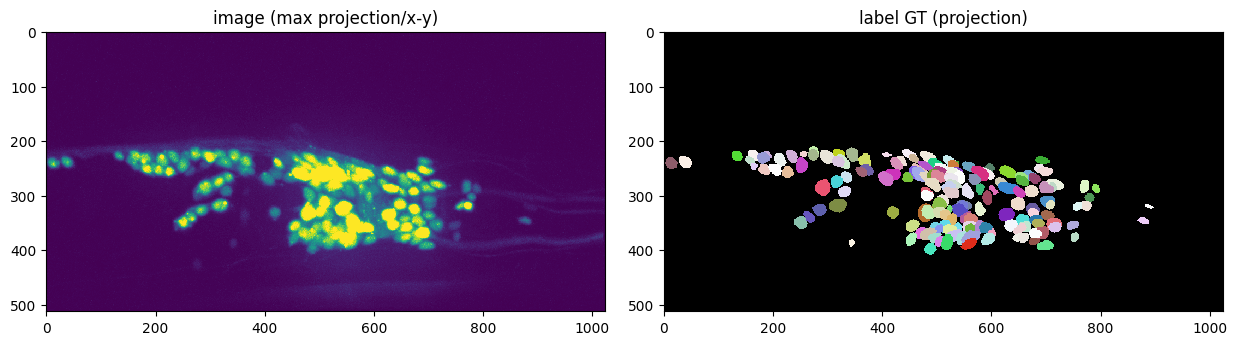

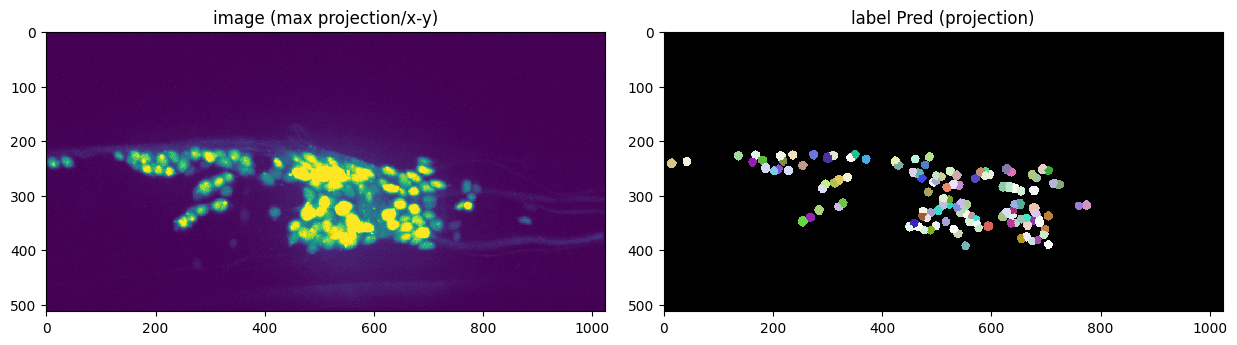

In [9]:
sdw.plot_img_label_max_projection(X_val[0],Y_val[0], lbl_title="label GT (projection)")
sdw.plot_img_label_max_projection(X_val[0],Y0_val_pred, lbl_title="label Pred (projection)")